In [3]:
import pandas as pd  # xử lý dữ liệu
import matplotlib.pyplot as plt  # trực quan hóa dữ liệu
import numpy as np  # tính toán số học

In [4]:
df = pd.read_csv('dataset.csv', encoding='utf-8')
df.head(3)

,DiaChi,Quan,TinhTrangBDS,DienTich,Phongngu,TenPhanKhu,SoTang,PhongTam,Loai,GiayTo,MaCanHo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia,USD,log_price
0,"Đường Nguyễn Văn Quỳ, Phường Phú Thuận, Quận 7...",Quận 7,Đã bàn giao,62.0,2.0,NaN,NaN,2.0,Chung cư,Đã có sổ,NaN,NaN,NaN,NaN,NaN,2.000000e+09,83333.0,11.330600
1,"Đường Nguyễn Văn Linh, Phường Tân Thuận Tây, Q...",Quận 7,Đã bàn giao,95.0,3.0,NaN,NaN,2.0,Chung cư,Đang chờ sổ,NaN,Nội thất cao cấp,NaN,NaN,Căn góc,5.300000e+09,220833.0,12.305162
2,"Đường Võ Văn Kiệt, Phường An Lạc, Quận Bình Tâ...",Quận Bình Tân,Chưa bàn giao,75.0,2.0,2,5.0,2.0,Chung cư,Giấy tờ khác,17,NaN,Đông Nam,Đông Nam,NaN,2.580000e+09,107500.0,11.585246


In [6]:
# Độ lớn dữ liệu
df.shape

(24019, 18)

In [7]:
df.describe()

,DienTich,Phongngu,SoTang,PhongTam,Gia,USD,log_price
count,24019.000000,24019.000000,6529.000000,24019.000000,2.401900e+04,2.401900e+04,24019.000000
mean,71.638943,2.049877,10.987594,1.751946,2.840117e+09,1.183382e+05,11.354806
std,30.631627,0.740393,7.378406,0.606200,7.788500e+09,3.245208e+05,0.992961
min,1.000000,1.000000,1.000000,1.000000,1.000000e+06,4.200000e+01,3.737670
25%,56.000000,2.000000,5.000000,1.000000,1.630000e+09,6.791700e+04,11.126042
50%,68.000000,2.000000,9.000000,2.000000,2.270000e+09,9.458300e+04,11.457233
75%,80.000000,2.000000,16.000000,2.000000,3.300000e+09,1.375000e+05,11.831379
max,500.000000,11.000000,70.000000,7.000000,9.800000e+11,4.083333e+07,17.525009


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24019 entries, 0 to 24018
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            24019 non-null  object 
 1   Quan              24019 non-null  object 
 2   TinhTrangBDS      24017 non-null  object 
 3   DienTich          24019 non-null  float64
 4   Phongngu          24019 non-null  float64
 5   TenPhanKhu        6865 non-null   object 
 6   SoTang            6529 non-null   float64
 7   PhongTam          24019 non-null  float64
 8   Loai              24019 non-null  object 
 9   GiayTo            18286 non-null  object 
 10  MaCanHo           3281 non-null   object 
 11  TinhTrangNoiThat  12420 non-null  object 
 12  HuongCuaChinh     9167 non-null   object 
 13  HuongBanCong      8502 non-null   object 
 14  DacDiem           5431 non-null   object 
 15  Gia               24019 non-null  float64
 16  USD               24019 non-null  float6

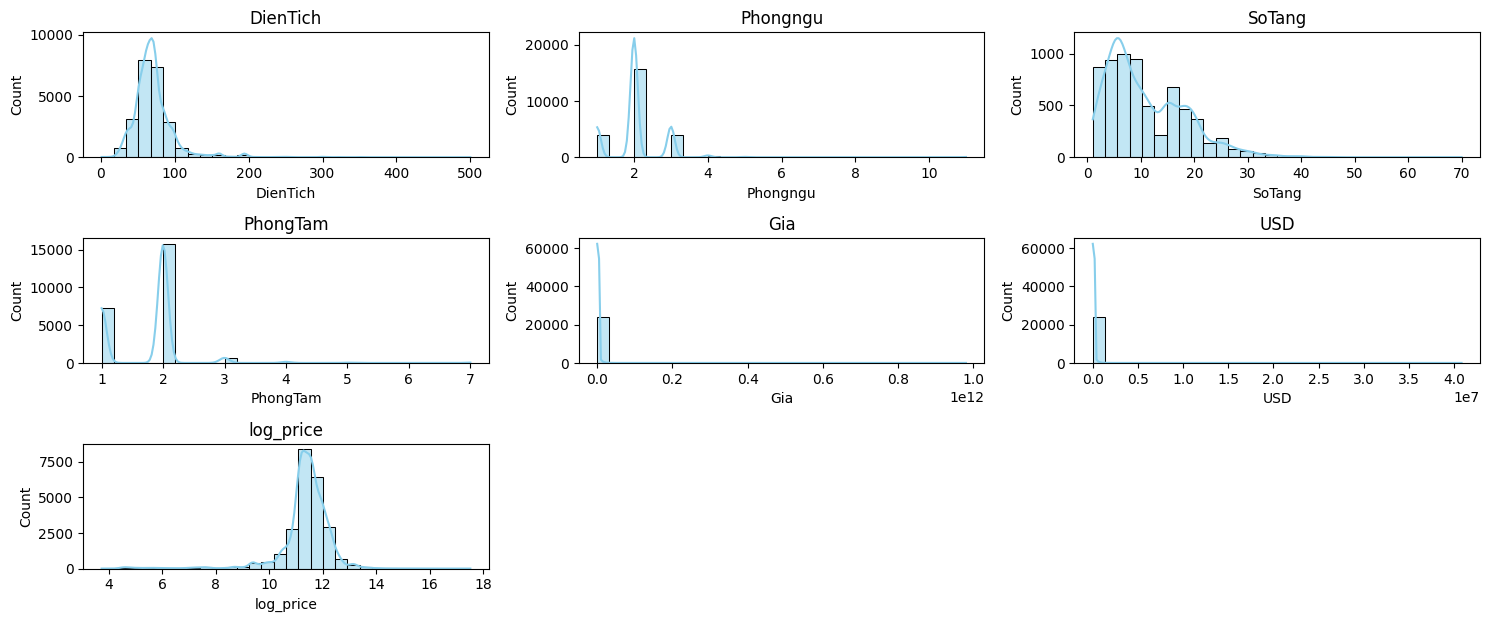

In [9]:
# Vẽ biểu đồ histogram với từng biến
import seaborn as sns
import matplotlib.pyplot as plt  # trực quan hóa dữ liệu
num_columns = df.select_dtypes(include=['number']).columns  # Chỉ chọn cột số
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(5, 3, i)  # Chỉnh kích thước lưới hiển thị
    sns.histplot(df[col].dropna(), bins=30, kde=True, color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

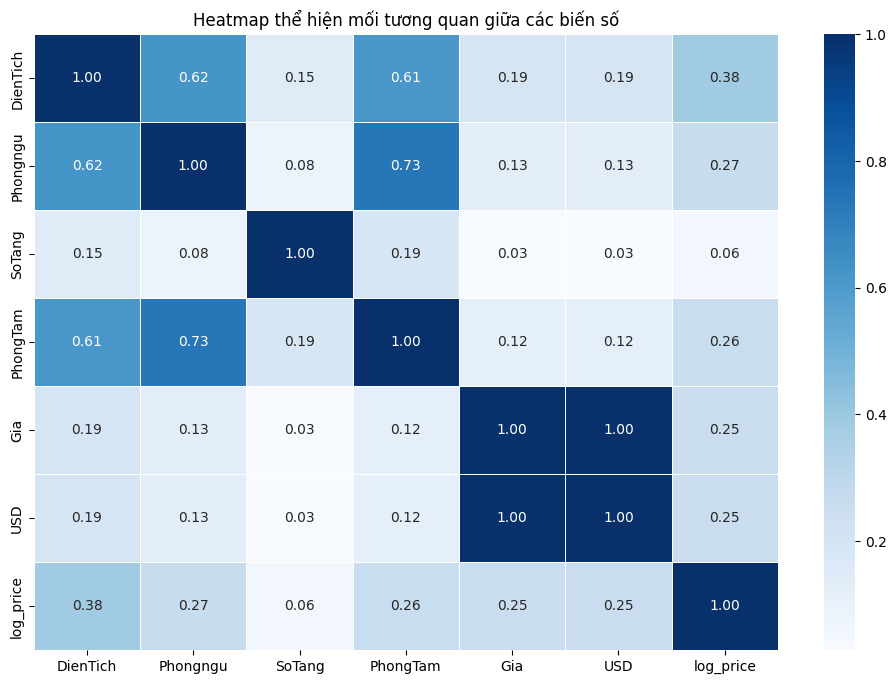

In [10]:
# Vẽ heatmap thể hiện mối quan hệ giữa các biến số
plt.figure(figsize=(12, 8))
corr_matrix = df[num_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title("Heatmap thể hiện mối tương quan giữa các biến số")
plt.show()

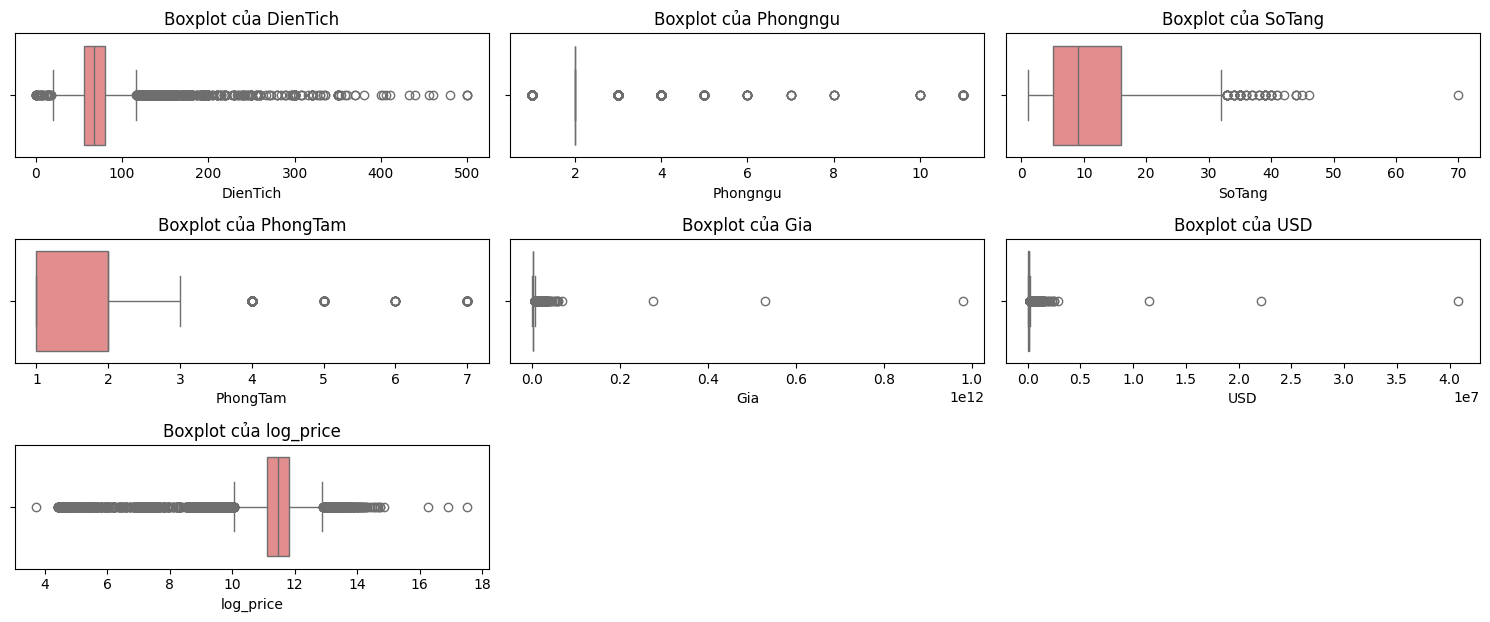

In [11]:
# Vẽ boxplot để phát hiện outliers
num_columns = df.select_dtypes(include=['number']).columns  # Chỉ chọn cột số
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot của {col}')

plt.tight_layout()
plt.show()

In [12]:
# Điền dữ liệu khuyết
df.fillna({"TenPhanKhu":0}, inplace=True)
df.fillna({"MaCanHo": 0 }, inplace=True)
df.fillna({"PhongTam": 0 }, inplace=True)
df.fillna({"SoTang": 0 }, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24019 entries, 0 to 24018
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            24019 non-null  object 
 1   Quan              24019 non-null  object 
 2   TinhTrangBDS      24017 non-null  object 
 3   DienTich          24019 non-null  float64
 4   Phongngu          24019 non-null  float64
 5   TenPhanKhu        24019 non-null  object 
 6   SoTang            24019 non-null  float64
 7   PhongTam          24019 non-null  float64
 8   Loai              24019 non-null  object 
 9   GiayTo            18286 non-null  object 
 10  MaCanHo           24019 non-null  object 
 11  TinhTrangNoiThat  12420 non-null  object 
 12  HuongCuaChinh     9167 non-null   object 
 13  HuongBanCong      8502 non-null   object 
 14  DacDiem           5431 non-null   object 
 15  Gia               24019 non-null  float64
 16  USD               24019 non-null  float6

In [13]:
#Chuyển dữ liệu chữ về dạng số
from sklearn.preprocessing import LabelEncoder
# Sử dụng cùng một LabelEncoder cho nhiều cột có thể gây lỗi tiềm ẩn vì fit_transform() làm "học" lại mỗi lần và ghi đè thông tin trước đó.
# Nên tạo encoder riêng cho từng cột để tránh nhầm lẫn:
df['TinhTrangBDS'] = LabelEncoder().fit_transform(df['TinhTrangBDS'])
df['Quan'] = LabelEncoder().fit_transform(df['Quan'])
df['Loai'] = LabelEncoder().fit_transform(df['Loai'])
df['GiayTo'] = LabelEncoder().fit_transform(df['GiayTo'])
df['TinhTrangNoiThat'] = LabelEncoder().fit_transform(df['TinhTrangNoiThat'])
df['HuongCuaChinh'] = LabelEncoder().fit_transform(df['HuongCuaChinh'])
df['HuongBanCong'] = LabelEncoder().fit_transform(df['HuongBanCong'])
df['DacDiem'] = LabelEncoder().fit_transform(df['DacDiem'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24019 entries, 0 to 24018
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DiaChi            24019 non-null  object 
 1   Quan              24019 non-null  int64  
 2   TinhTrangBDS      24019 non-null  int64  
 3   DienTich          24019 non-null  float64
 4   Phongngu          24019 non-null  float64
 5   TenPhanKhu        24019 non-null  object 
 6   SoTang            24019 non-null  float64
 7   PhongTam          24019 non-null  float64
 8   Loai              24019 non-null  int64  
 9   GiayTo            24019 non-null  int64  
 10  MaCanHo           24019 non-null  object 
 11  TinhTrangNoiThat  24019 non-null  int64  
 12  HuongCuaChinh     24019 non-null  int64  
 13  HuongBanCong      24019 non-null  int64  
 14  DacDiem           24019 non-null  int64  
 15  Gia               24019 non-null  float64
 16  USD               24019 non-null  float6

In [15]:
#Xóa bỏ dữ liệu thừa
df = df.drop(['USD', 'log_price', 'DiaChi', 'TenPhanKhu', 'MaCanHo'], axis=1)
df.head(5)

,Quan,TinhTrangBDS,DienTich,Phongngu,SoTang,PhongTam,Loai,GiayTo,TinhTrangNoiThat,HuongCuaChinh,HuongBanCong,DacDiem,Gia
0,13,1,62.0,2.0,0.0,2.0,2,2,4,8,8,1,2.000000e+09
1,13,1,95.0,3.0,0.0,2.0,2,1,2,8,8,0,5.300000e+09
2,17,0,75.0,2.0,5.0,2.0,2,0,4,7,7,1,2.580000e+09
3,21,1,70.0,1.0,7.0,1.0,2,1,2,7,3,1,4.000000e+09
4,12,1,83.0,2.0,0.0,2.0,2,2,2,3,8,1,2.950000e+09


In [16]:
z_threshold = 3

for column in df.columns:
    # Tính trung bình và độ lệch chuẩn của cột
    mean = df[column].mean()
    std = df[column].std()

    # Tính Z-score
    z_scores = (df[column] - mean) / std

    # Xác định các chỉ số vượt ngưỡng Z-score
    index_lower = np.where(z_scores < -z_threshold)[0]
    index_upper = np.where(z_scores > z_threshold)[0]

    # In số lượng outliers
    print(column + ":", len(index_lower), len(index_upper))

    # Xử lý outliers: Thay thế bằng ngưỡng
    lower_threshold = mean - z_threshold * std
    upper_threshold = mean + z_threshold * std
    df.loc[index_lower, column] = lower_threshold
    df.loc[index_upper, column] = upper_threshold

Quan: 0 0
TinhTrangBDS: 0 0
DienTich: 0 407
Phongngu: 0 113
SoTang: 0 553
PhongTam: 0 244
Loai: 727 758
GiayTo: 0 0
TinhTrangNoiThat: 0 0
HuongCuaChinh: 0 0
HuongBanCong: 0 0
DacDiem: 0 0
Gia: 0 34


<ipython-input-16-39569d7753ba>:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.28384464057672987' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[index_lower, column] = lower_threshold


In [29]:
from sklearn.model_selection import KFold
# Chia dữ liệu thành k tập con
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [30]:
#Chia tập dữ liệu
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Gia'])
y = df['Gia']

In [31]:
from sklearn.linear_model import Ridge
# Huấn luyện mô hình trên từng fold
coefs = []
# Vòng lặp qua từng fold
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    ridge = Ridge(alpha=1)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    y_pred=ridge.predict(X_test)
    #Đánh giá mô hình
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    print("MAE:", mean_absolute_error(y_test,y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))

MAE: 1048160378.4474481
MSE: 3.5956437362045937e+18
R2 Score: 0.41963338979490694
MAE: 1005373449.9004325
MSE: 3.528251581642308e+18
R2 Score: 0.3691905470512782
MAE: 989209516.9064448
MSE: 3.1577945597304745e+18
R2 Score: 0.40258154758041254
MAE: 996876867.7339109
MSE: 3.1132053373884083e+18
R2 Score: 0.41776053857821194
MAE: 985791435.3584342
MSE: 2.841964779477694e+18
R2 Score: 0.41959791774600763
MAE: 979822131.5465608
MSE: 3.0041406466795796e+18
R2 Score: 0.4495895069375455
MAE: 943686278.8239155
MSE: 2.6886165819769984e+18
R2 Score: 0.42007394428422584
MAE: 966909607.4702531
MSE: 2.8503292378099594e+18
R2 Score: 0.4120486957203252
MAE: 949477930.2414191
MSE: 2.7822107751465677e+18
R2 Score: 0.4482350875788558
MAE: 959615250.0513121
MSE: 2.6952433797293076e+18
R2 Score: 0.38207662083539606


**TRÍCH CHỌN DỮ LIỆU**

In [32]:
df.corr()['Gia'].sort_values(ascending=False)

,Gia
Gia,1.000000
DienTich,0.639110
Phongngu,0.428330
PhongTam,0.383986
Loai,0.166083
TinhTrangBDS,0.138377
SoTang,0.032414
GiayTo,-0.006869
HuongBanCong,-0.032693
Quan,-0.036950


In [33]:
X = df.drop(columns=['DacDiem','HuongCuaChinh','TinhTrangNoiThat','Quan','HuongBanCong','Loai','TinhTrangBDS','SoTang','GiayTo'],axis = 1)
y = df['Gia']

In [34]:
from sklearn.linear_model import Ridge
# Huấn luyện mô hình trên từng fold
coefs = []
# Vòng lặp qua từng fold
for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    ridge = Ridge(alpha=1)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    y_pred=ridge.predict(X_test)
    #Đánh giá mô hình
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    print("MAE:", mean_absolute_error(y_test,y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.9671e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.9321e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.92426e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.92112e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning:

MAE: 9.626242410481522e-07
MSE: 2.8806899372580536e-12
R2 Score: 1.0
MAE: 2.2103663744850024e-06
MSE: 1.1524821551207193e-11
R2 Score: 1.0
MAE: 1.3911912061094146e-06
MSE: 4.679101272942337e-12
R2 Score: 1.0
MAE: 1.6592320079584107e-06
MSE: 4.699030194794174e-12
R2 Score: 1.0
MAE: 9.538012973151537e-07
MSE: 2.119356902594697e-12
R2 Score: 1.0
MAE: 1.400380455838403e-06
MSE: 6.448896133808555e-12
R2 Score: 1.0
MAE: 4.363082447007832e-07
MSE: 4.960424973293569e-13
R2 Score: 1.0
MAE: 3.4824620892016913e-07
MSE: 2.999426653056836e-13
R2 Score: 1.0
MAE: 1.0132651968388435e-06
MSE: 1.5495434761190359e-12
R2 Score: 1.0
MAE: 9.030052869953448e-07
MSE: 2.222760462167118e-12
R2 Score: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.90964e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.91751e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.88472e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


**CẢI THIỆN MÔ HÌNH**

**TÌM KIẾM GIÁ TRỊ PHẠT PHÙ HỢP**

In [37]:
# Tìm kiếm tham số tốt nhất cho mô hình

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# defining parameter range
param_grid = {'ridge__alpha': [0.1, 1, 10, 1000000000000]}
pipeline = Pipeline([
    ('ridge', Ridge())
])

for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    grid = GridSearchCV(pipeline, param_grid,cv = 5,n_jobs=12, scoring='r2',verbose= 2, refit= True)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    y_pred=grid.predict(X_test)
    print("MAE:", mean_absolute_error(y_test,y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.96631e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'ridge__alpha': 0.1}
MAE: 1.17880177469327e-06
MSE: 4.495792475135596e-12
R2 Score: 1.0
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.93132e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'ridge__alpha': 0.1}
MAE: 2.2370654191638807e-06
MSE: 1.2208490069069943e-11
R2 Score: 1.0
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.92349e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'ridge__alpha': 0.1}
MAE: 1.361903592596741e-06
MSE: 4.5971509806720096e-12
R2 Score: 1.0
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.92035e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'ridge__alpha': 0.1}
MAE: 1.4684599615652098e-06
MSE: 3.615484689711437e-12
R2 Score: 1.0
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.91707e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'ridge__alpha': 0.1}
MAE: 1.0447877712802128e-06
MSE: 2.031234058975153e-12
R2 Score: 1.0
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.93705e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'ridge__alpha': 0.1}
MAE: 1.657813699058351e-06
MSE: 8.379609176823146e-12
R2 Score: 1.0
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.89644e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'ridge__alpha': 0.1}
MAE: 5.012852481747051e-07
MSE: 5.694744203114808e-13
R2 Score: 1.0
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.90888e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'ridge__alpha': 0.1}
MAE: 4.4841223941506393e-07
MSE: 4.3512261748141055e-13
R2 Score: 1.0
Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.91674e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


{'ridge__alpha': 0.1}
MAE: 7.973135147339895e-07
MSE: 1.1057471651559568e-12
R2 Score: 1.0
Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'ridge__alpha': 0.1}
MAE: 8.692827598594815e-07
MSE: 1.9137886190235636e-12
R2 Score: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.88397e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
